In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import warnings

warnings.filterwarnings('ignore')

In [2]:
movie = pd.read_csv('movies.csv')
credit = pd.read_csv('credits.csv')

In [3]:
movie

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

In [4]:
credit

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...
4798,9367,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,72766,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4800,231617,"Signed, Sealed, Delivered","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4801,126186,Shanghai Calling,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


In [5]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [6]:
movie.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [7]:
credit.isnull().sum()

movie_id    0
title       0
cast        0
crew        0
dtype: int64

In [8]:
movie.shape , credit.shape

((4803, 20), (4803, 4))

In [9]:
movie['genres'][0]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [10]:
movie['production_companies'][0]

'[{"name": "Ingenious Film Partners", "id": 289}, {"name": "Twentieth Century Fox Film Corporation", "id": 306}, {"name": "Dune Entertainment", "id": 444}, {"name": "Lightstorm Entertainment", "id": 574}]'

In [11]:
json.loads(movie['production_companies'][0])

[{'name': 'Ingenious Film Partners', 'id': 289},
 {'name': 'Twentieth Century Fox Film Corporation', 'id': 306},
 {'name': 'Dune Entertainment', 'id': 444},
 {'name': 'Lightstorm Entertainment', 'id': 574}]

In [12]:
credit.head(2)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [13]:
credit['cast'][0]

'[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "gender": 

In [14]:
json.loads(credit['cast'][0])[:2]

[{'cast_id': 242,
  'character': 'Jake Sully',
  'credit_id': '5602a8a7c3a3685532001c9a',
  'gender': 2,
  'id': 65731,
  'name': 'Sam Worthington',
  'order': 0},
 {'cast_id': 3,
  'character': 'Neytiri',
  'credit_id': '52fe48009251416c750ac9cb',
  'gender': 1,
  'id': 8691,
  'name': 'Zoe Saldana',
  'order': 1}]

## Data Merging

In [15]:
movie_credit = pd.merge(movie, credit , left_on = 'id' , right_on = 'movie_id')
movie_credit

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]",...,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,9367,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],...,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,72766,Newlyweds,"[

In [16]:
movie_credit.shape

(4803, 24)

In [17]:
movie_credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [18]:
movie_credit['release_date'] = pd.to_datetime(movie_credit['release_date'])
movie_credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                4803 non-null   int64         
 1   genres                4803 non-null   object        
 2   homepage              1712 non-null   object        
 3   id                    4803 non-null   int64         
 4   keywords              4803 non-null   object        
 5   original_language     4803 non-null   object        
 6   original_title        4803 non-null   object        
 7   overview              4800 non-null   object        
 8   popularity            4803 non-null   float64       
 9   production_companies  4803 non-null   object        
 10  production_countries  4803 non-null   object        
 11  release_date          4802 non-null   datetime64[ns]
 12  revenue               4803 non-null   int64         
 13  runtime           

## Need to filter only retain records for years where there were 100 or more movies release

In [19]:
release_year = movie_credit['release_date'].dt.year.value_counts(dropna= False)
release_year

2009.0    247
2014.0    238
2006.0    237
2013.0    231
2008.0    227
         ... 
NaN         1
1932.0      1
1916.0      1
1934.0      1
1925.0      1
Name: release_date, Length: 91, dtype: int64

In [20]:
movie_credit['release_date'].dt.year.value_counts(dropna= False).head(50)

2009.0    247
2014.0    238
2006.0    237
2013.0    231
2008.0    227
2010.0    225
2011.0    223
2005.0    217
2015.0    216
2012.0    208
2004.0    204
2002.0    203
2007.0    195
2001.0    183
1999.0    171
2003.0    169
2000.0    166
1998.0    133
1997.0    112
2016.0    104
1996.0     97
1995.0     70
1994.0     55
1993.0     47
1992.0     34
1981.0     33
1989.0     32
1987.0     31
1988.0     31
1991.0     30
1990.0     29
1984.0     28
1985.0     28
1986.0     26
1982.0     24
1983.0     23
1980.0     22
1979.0     16
1977.0     16
1978.0     14
1970.0     12
1964.0     10
1969.0     10
1968.0     10
1971.0     10
1976.0      9
1973.0      9
1972.0      9
1965.0      8
1963.0      8
Name: release_date, dtype: int64

In [21]:
7005

7005

In [22]:
release_year[release_year >= 0].sort_index().tail(50)

1969.0     10
1970.0     12
1971.0     10
1972.0      9
1973.0      9
1974.0      8
1975.0      6
1976.0      9
1977.0     16
1978.0     14
1979.0     16
1980.0     22
1981.0     33
1982.0     24
1983.0     23
1984.0     28
1985.0     28
1986.0     26
1987.0     31
1988.0     31
1989.0     32
1990.0     29
1991.0     30
1992.0     34
1993.0     47
1994.0     55
1995.0     70
1996.0     97
1997.0    112
1998.0    133
1999.0    171
2000.0    166
2001.0    183
2002.0    203
2003.0    169
2004.0    204
2005.0    217
2006.0    237
2007.0    195
2008.0    227
2009.0    247
2010.0    225
2011.0    223
2012.0    208
2013.0    231
2014.0    238
2015.0    216
2016.0    104
2017.0      1
NaN         1
Name: release_date, dtype: int64

In [23]:
movie_years = release_year[release_year >=100].sort_index()
movie_years

1997.0    112
1998.0    133
1999.0    171
2000.0    166
2001.0    183
2002.0    203
2003.0    169
2004.0    204
2005.0    217
2006.0    237
2007.0    195
2008.0    227
2009.0    247
2010.0    225
2011.0    223
2012.0    208
2013.0    231
2014.0    238
2015.0    216
2016.0    104
Name: release_date, dtype: int64

In [24]:
movie_years = release_year[release_year >=100].sort_index()
movie_years.index = movie_years.index.astype(int)
movie_years

1997    112
1998    133
1999    171
2000    166
2001    183
2002    203
2003    169
2004    204
2005    217
2006    237
2007    195
2008    227
2009    247
2010    225
2011    223
2012    208
2013    231
2014    238
2015    216
2016    104
Name: release_date, dtype: int64

In [25]:
years = movie_years.index.to_list()
movie_counts = movie_years.values.tolist()

In [26]:
movie_counts

[112,
 133,
 171,
 166,
 183,
 203,
 169,
 204,
 217,
 237,
 195,
 227,
 247,
 225,
 223,
 208,
 231,
 238,
 216,
 104]

## No. of Movies  release per year 

In [27]:
import matplotlib.pyplot as plt

#find year with highest movie release

max_count_year = years[movie_counts.index(max(movie_counts))]


plt.show()

In [28]:
years

[1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016]

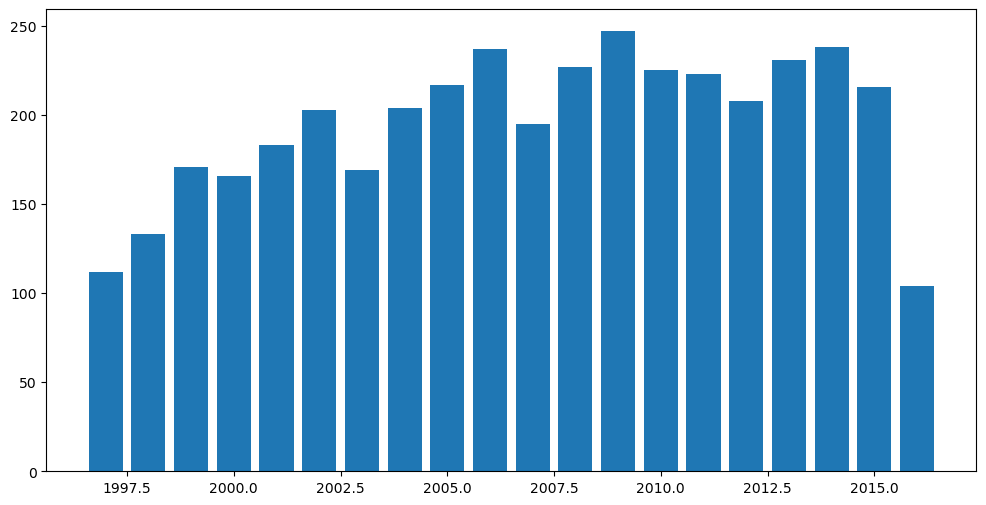

In [29]:
import matplotlib.pyplot as plt

#find year with highest movie release

max_count_year = years[movie_counts.index(max(movie_counts))]

#create sttlish Bar chart

plt.figure(figsize = (12,6))
plt.bar(years ,movie_counts)


plt.show()

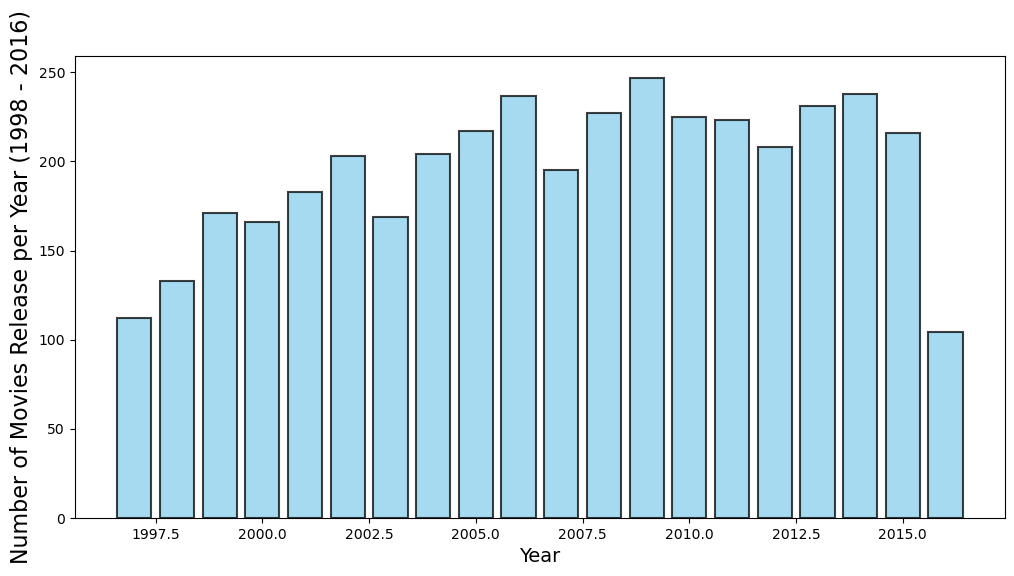

In [30]:
import matplotlib.pyplot as plt

#find year with highest movie release

max_count_year = years[movie_counts.index(max(movie_counts))]

#create stylish Bar chart

plt.figure(figsize = (12,6))
plt.bar(years ,movie_counts , color = 'skyblue' , alpha = 0.75 , edgecolor = 'black' , linewidth = 1.5)
plt.xlabel ('Year' , fontsize = 14)
plt.ylabel('Number of Movies Release per Year (1998 - 2016)' , fontsize = 16)





plt.show()

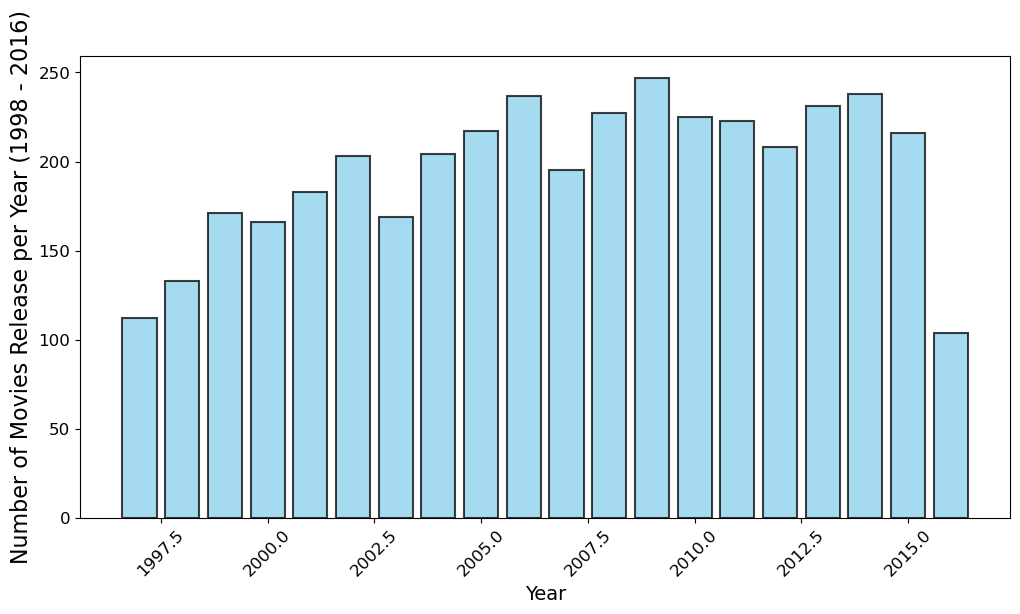

In [31]:
import matplotlib.pyplot as plt

#find year with highest movie release

max_count_year = years[movie_counts.index(max(movie_counts))]

#create stylish Bar chart

plt.figure(figsize = (12,6))
plt.bar(years ,movie_counts , color = 'skyblue' , alpha = 0.75 , edgecolor = 'black' , linewidth = 1.5)
plt.xlabel ('Year' , fontsize = 14)
plt.ylabel('Number of Movies Release per Year (1998 - 2016)' , fontsize = 16)

plt.xticks(rotation = 45 , fontsize = 12)
plt.yticks(fontsize = 12)




plt.show()

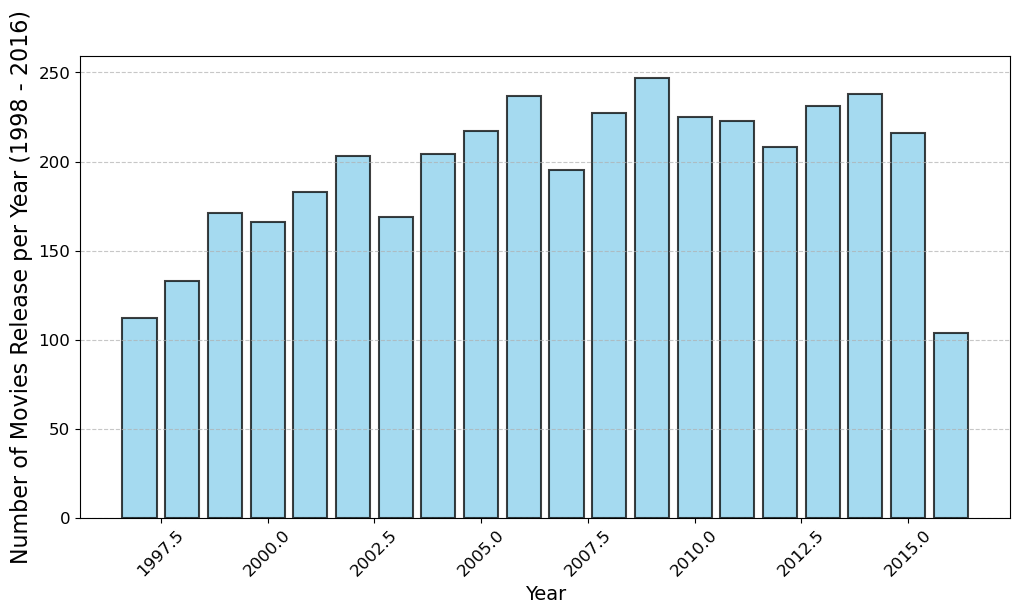

In [32]:
import matplotlib.pyplot as plt

#find year with highest movie release

max_count_year = years[movie_counts.index(max(movie_counts))]

#create stylish Bar chart

plt.figure(figsize = (12,6))
plt.bar(years ,movie_counts , color = 'skyblue' , alpha = 0.75 , edgecolor = 'black' , linewidth = 1.5)
plt.xlabel ('Year' , fontsize = 14)
plt.ylabel('Number of Movies Release per Year (1998 - 2016)' , fontsize = 16)

plt.xticks(rotation = 45 , fontsize = 12)
plt.yticks(fontsize = 12)

# Dash line in graph
plt.grid(axis = 'y' , linestyle = '--' , alpha = 0.7)
plt.grid(axis = 'x'  , linestyle = ' ')




plt.show()

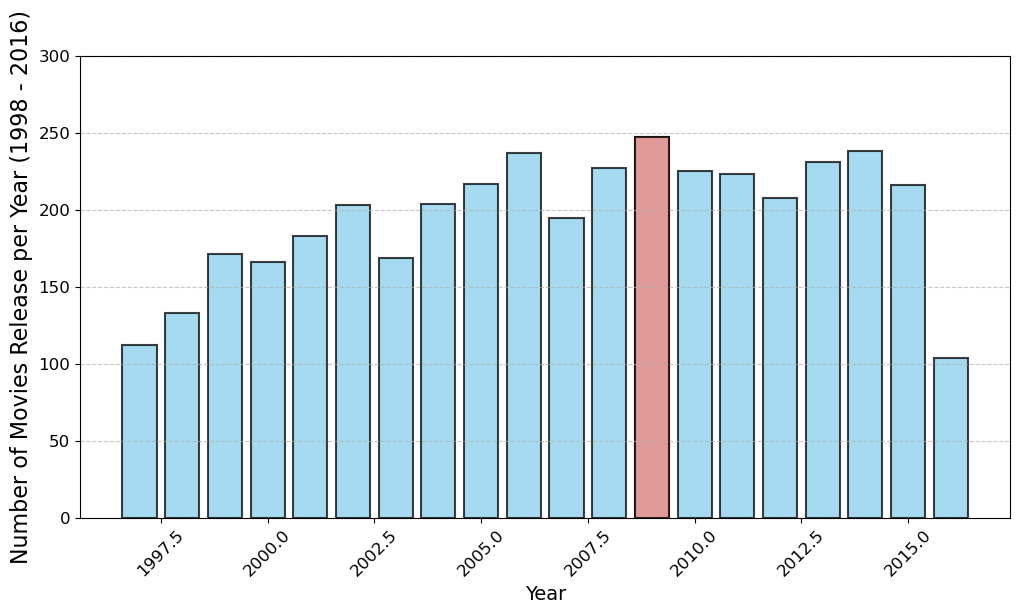

In [33]:
import matplotlib.pyplot as plt

#find year with highest movie release

max_count_year = years[movie_counts.index(max(movie_counts))]

#create stylish Bar chart

plt.figure(figsize = (12,6))
plt.bar(years ,movie_counts , color = 'skyblue' , alpha = 0.75 , edgecolor = 'black' , linewidth = 1.5)
plt.xlabel ('Year' , fontsize = 14)
plt.ylabel('Number of Movies Release per Year (1998 - 2016)' , fontsize = 16)

plt.xticks(rotation = 45 , fontsize = 12)
plt.yticks(fontsize = 12)

# Dash line in graph
plt.grid(axis = 'y' , linestyle = '--' , alpha = 0.7)
plt.grid(axis = 'x'  , linestyle = ' ')

# Highlight Bar for year with highest movie release

highlight_bar = years.index(max_count_year)
plt.bar(years[highlight_bar],movie_counts[highlight_bar], color = 'salmon' , alpha = 0.7, edgecolor = 'black' , linewidth = 1.5)

# Customize y-ticks Range

plt.yticks(range(0,301,50) , fontsize = 12)




plt.show()

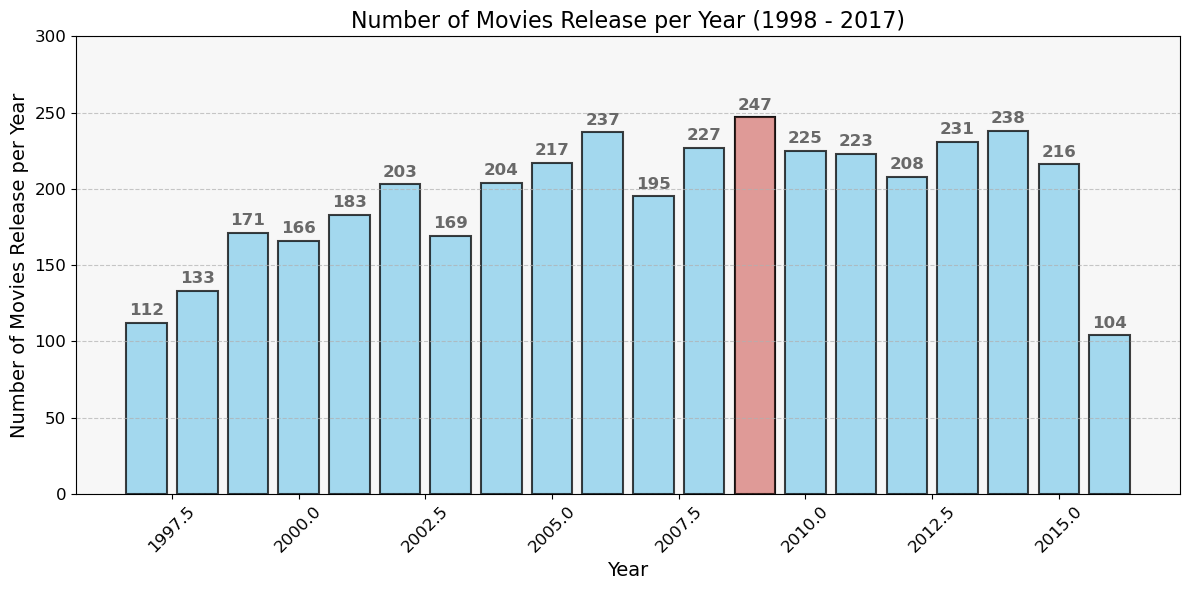

In [34]:
import matplotlib.pyplot as plt

#find year with highest movie release

max_count_year = years[movie_counts.index(max(movie_counts))]

#create stylish Bar chart

plt.figure(figsize = (12,6))
plt.bar(years ,movie_counts , color = 'skyblue' , alpha = 0.75 , edgecolor = 'black' , linewidth = 1.5)
plt.xlabel ('Year' , fontsize = 14)
plt.ylabel('Number of Movies Release per Year' , fontsize = 14)
plt.title('Number of Movies Release per Year (1998 - 2017)', fontsize = 16)

# Customize ticks label

plt.xticks(rotation = 45 , fontsize = 12)
plt.yticks(fontsize = 12)

# Dash line in graph
plt.grid(axis = 'y' , linestyle = '--' , alpha = 0.7)
plt.grid(axis = 'x'  , linestyle = ' ')

# Highlight Bar for year with highest movie release

highlight_bar = years.index(max_count_year)
plt.bar(years[highlight_bar],movie_counts[highlight_bar], color = 'salmon' , alpha = 0.7, edgecolor = 'black' , linewidth = 1.5)

# Customize y-ticks Range

plt.yticks(range(0,301,50) , fontsize = 12)

# Add Data Labels

for year, count in zip (years ,movie_counts):
    plt.text(year ,count + 5 , str (count), ha = 'center' , fontsize = 12 , fontweight = 'bold' , color = 'dimgrey')
    
#Add Background color

ax = plt.gca()
ax.set_facecolor('#f7f7f7')

# Display Aesthetic Chart

plt.tight_layout()



plt.show()

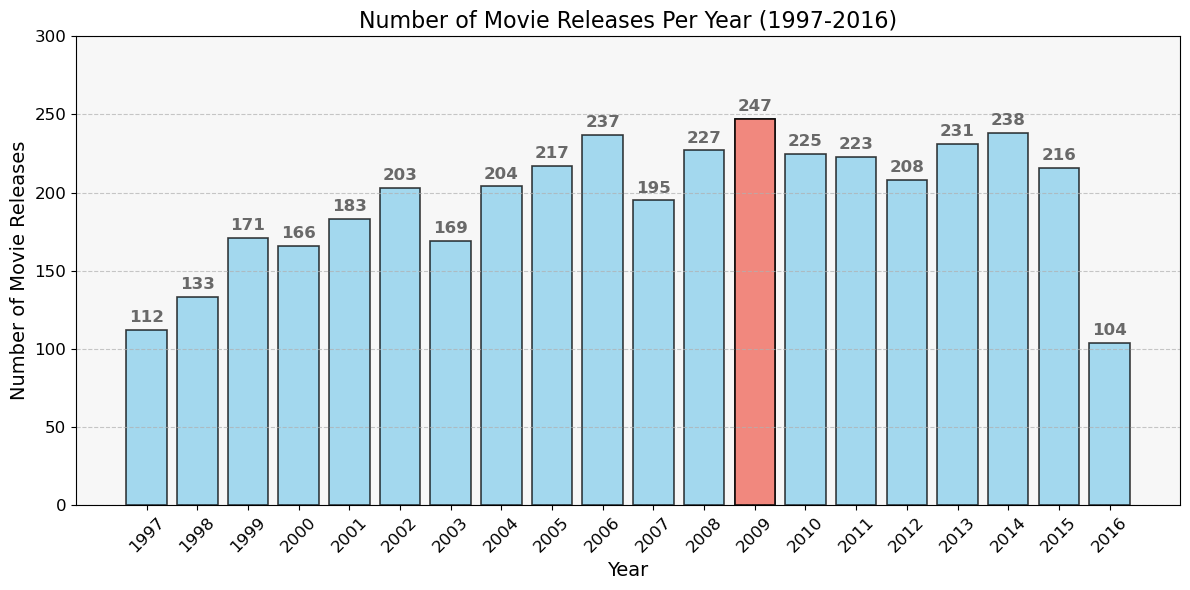

In [35]:
import matplotlib.pyplot as plt

# Find the year with the highest movie releases
max_count_year = years[movie_counts.index(max(movie_counts))]

# Create a stylish bar chart
plt.figure(figsize=(12, 6))
plt.bar(years, movie_counts, color='skyblue', alpha=0.75, edgecolor='black', linewidth=1.2)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Movie Releases', fontsize=14)
plt.title('Number of Movie Releases Per Year (1997-2016)', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='')

# Highlight the bar for the year with the highest movie releases
highlighted_bar = years.index(max_count_year)
plt.bar(years[highlighted_bar], movie_counts[highlighted_bar], color='salmon', alpha=0.9, edgecolor='black', linewidth=1.2)

# customised y-ticks range
plt.yticks(range(0, 301, 50), fontsize=12)


# Adding data labels
for year, count in zip(years, movie_counts):
    plt.text(year, count + 5, str(count), ha='center', fontsize=12, fontweight='bold', color='dimgrey')
    

# Customize tick labels
plt.xticks(years, rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Adding a background color
ax = plt.gca()
ax.set_facecolor('#f7f7f7')



# Display the chart with improved aesthetics
plt.tight_layout()
plt.show()

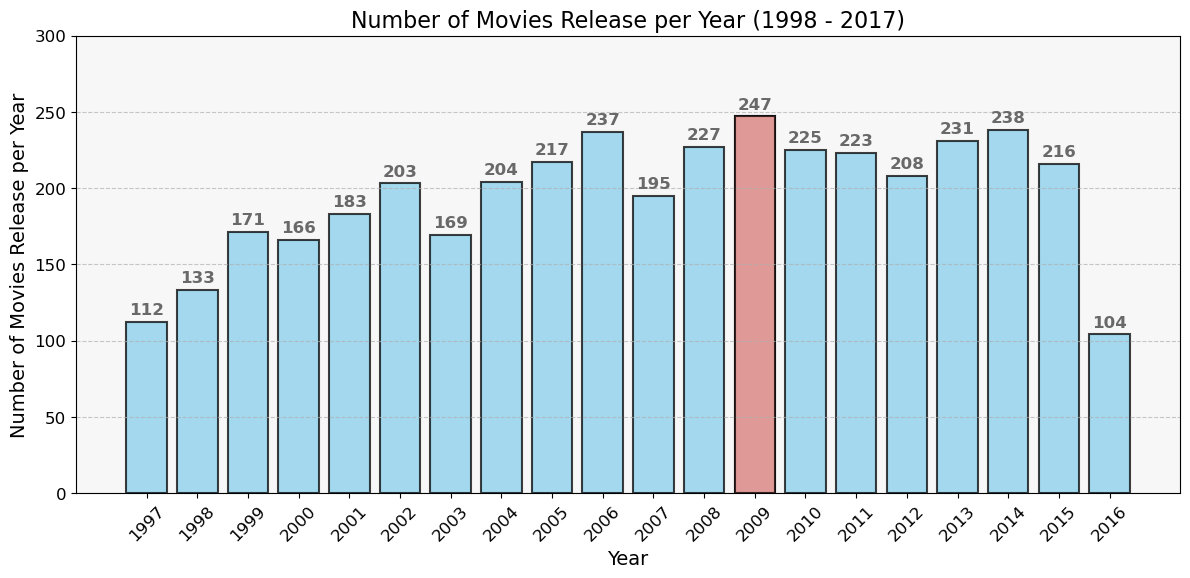

In [36]:
import matplotlib.pyplot as plt

#find year with highest movie release

max_count_year = years[movie_counts.index(max(movie_counts))]

#create stylish Bar chart

plt.figure(figsize = (12,6))
plt.bar(years ,movie_counts , color = 'skyblue' , alpha = 0.75 , edgecolor = 'black' , linewidth = 1.5)
plt.xlabel ('Year' , fontsize = 14)
plt.ylabel('Number of Movies Release per Year' , fontsize = 14)
plt.title('Number of Movies Release per Year (1998 - 2017)', fontsize = 16)

# Customize ticks label

plt.xticks(rotation = 45 , fontsize = 12)
plt.yticks(fontsize = 12)

# Dash line in graph
plt.grid(axis = 'y' , linestyle = '--' , alpha = 0.7)
plt.grid(axis = 'x'  , linestyle = ' ')

# Highlight Bar for year with highest movie release

highlight_bar = years.index(max_count_year)
plt.bar(years[highlight_bar],movie_counts[highlight_bar], color = 'salmon' , alpha = 0.7, edgecolor = 'black' , linewidth = 1.5)

# Customize y-ticks Range

plt.yticks(range(0,301,50) , fontsize = 12)

# Add Data Labels

for year, count in zip (years ,movie_counts):
    plt.text(year ,count + 5 , str (count), ha = 'center' , fontsize = 12 , fontweight = 'bold' , color = 'dimgrey')
    
#Add Background color

ax = plt.gca()
ax.set_facecolor('#f7f7f7')

# Display Aesthetic Chart

plt.tight_layout()

# Print individual year in x axis

plt.xticks(years, rotation = 45 , fontsize = 12)



plt.show()

In [37]:
movie['popularity']

0       150.437577
1       139.082615
2       107.376788
3       112.312950
4        43.926995
           ...    
4798     14.269792
4799      0.642552
4800      1.444476
4801      0.857008
4802      1.929883
Name: popularity, Length: 4803, dtype: float64

## Movie Popularity , Find Mean , Min, Max 

In [38]:
movie['popularity'].agg(func = ['min' , 'max' ,'mean'])

min       0.000000
max     875.581305
mean     21.492301
Name: popularity, dtype: float64

## Budget VS Revenue Graph Plot , Make Scatter Graph

In [39]:
budget = movie_credit['budget']
budget

0       237000000
1       300000000
2       245000000
3       250000000
4       260000000
          ...    
4798       220000
4799         9000
4800            0
4801            0
4802            0
Name: budget, Length: 4803, dtype: int64

In [40]:
revenue = movie_credit['revenue']
revenue

0       2787965087
1        961000000
2        880674609
3       1084939099
4        284139100
           ...    
4798       2040920
4799             0
4800             0
4801             0
4802             0
Name: revenue, Length: 4803, dtype: int64

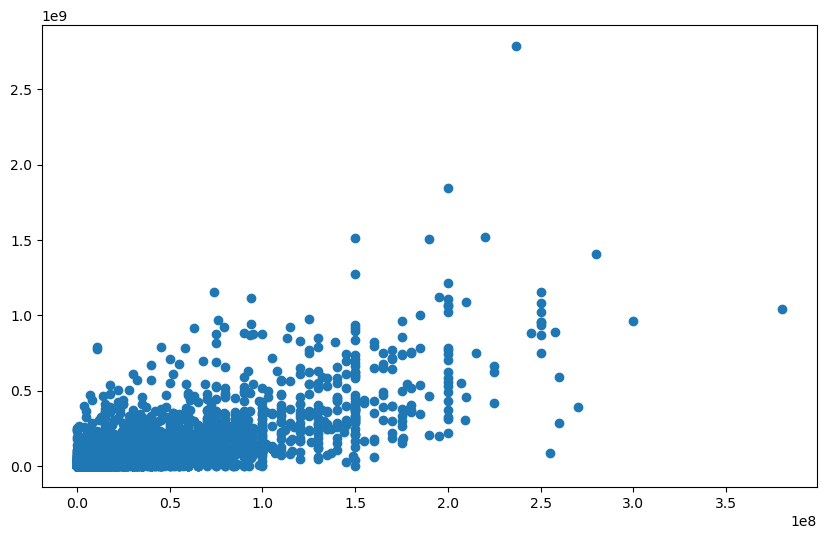

In [41]:
budget = movie_credit['budget']
revenue = movie_credit['revenue']

# Function to format Budget value as Alphanumeric Unit

def format_budget(value , pos):
    if value >=  1e9:
        return f'{value / 1e9 :.0f}B'
    elif value >= 1e6:
        return f'{value / 1e6 : .0f}M'
    elif value >= 1e3:
        return f'{value / 1e3 : .0f}K'
    else:
        return f'{value : .0f}'

# Create Scatter Plot

plt.figure(figsize = (10,6))
plt.scatter(budget , revenue)

plt.show()

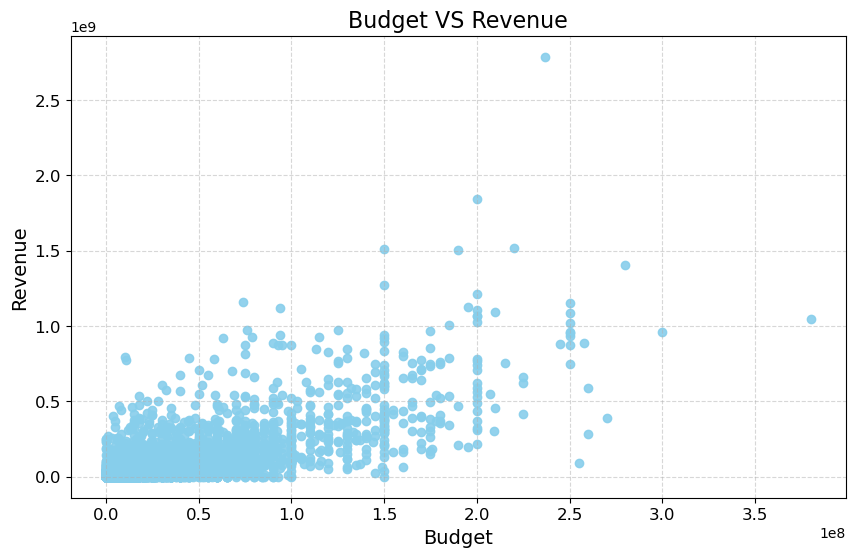

In [42]:
budget = movie_credit['budget']
revenue = movie_credit['revenue']

# Function to format Budget value as Alphanumeric Unit

def format_budget(value , pos):
    if value >=  1e9:
        return f'{value / 1e9 :.0f}B'
    elif value >= 1e6:
        return f'{value / 1e6 : .0f}M'
    elif value >= 1e3:
        return f'{value / 1e3 : .0f}K'
    else:
        return f'{value : .0f}'

# Create Scatter Plot

plt.figure(figsize = (10,6))
plt.scatter(budget , revenue , color = 'skyblue' , alpha =0.9)

plt.xlabel('Budget' , fontsize = 14)
plt.ylabel('Revenue' , fontsize = 14)
plt.title('Budget VS Revenue' , fontsize = 16)

# Customize Appearance

plt.grid(True, linestyle = '--' , alpha = 0.5)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.show()

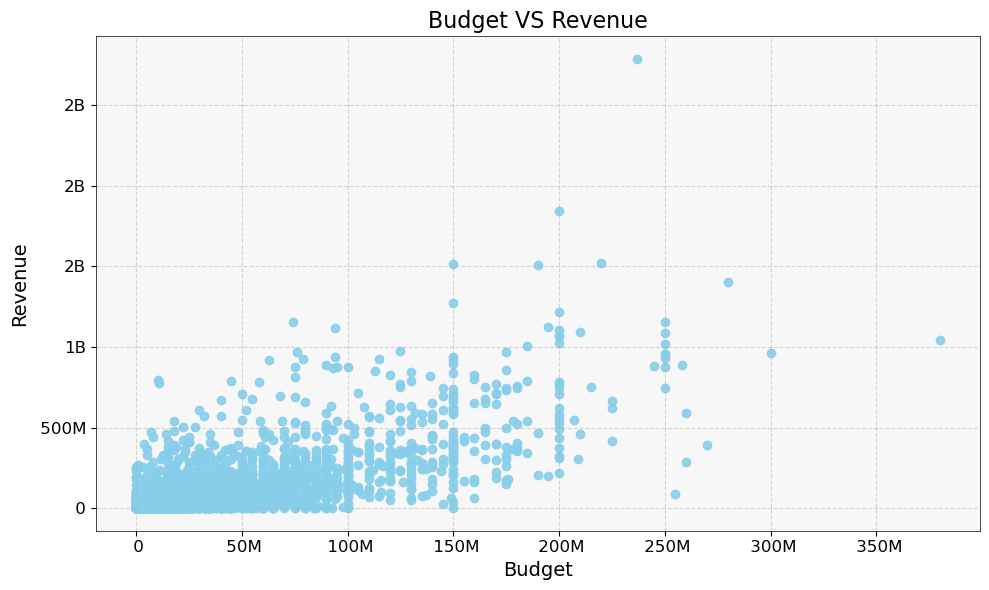

In [43]:
budget = movie_credit['budget']
revenue = movie_credit['revenue']

# Function to format Budget value as Alphanumeric Unit

def format_budget(value , pos):
    if value >=  1e9:
        return f'{value / 1e9 :.0f}B'
    elif value >= 1e6:
        return f'{value / 1e6 : .0f}M'
    elif value >= 1e3:
        return f'{value / 1e3 : .0f}K'
    else:
        return f'{value : .0f}'

# Create Scatter Plot

plt.figure(figsize = (10,6))
plt.scatter(budget , revenue , color = 'skyblue' , alpha =0.9)

plt.xlabel('Budget' , fontsize = 14)
plt.ylabel('Revenue' , fontsize = 14)
plt.title('Budget VS Revenue' , fontsize = 16)

# Customize Appearance and Boundry Appearance

plt.grid(True, linestyle = '--' , alpha = 0.5)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.gca().spines['top'].set_linewidth(0.5)
plt.gca().spines['right'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)

#Add background color

plt.gca().set_facecolor('#f7f7f7')

# Update x & y axis tick label using formt Budget Function , it show Actual value in Million / Billion

plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_budget))
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(format_budget))

plt.tight_layout()
plt.show()

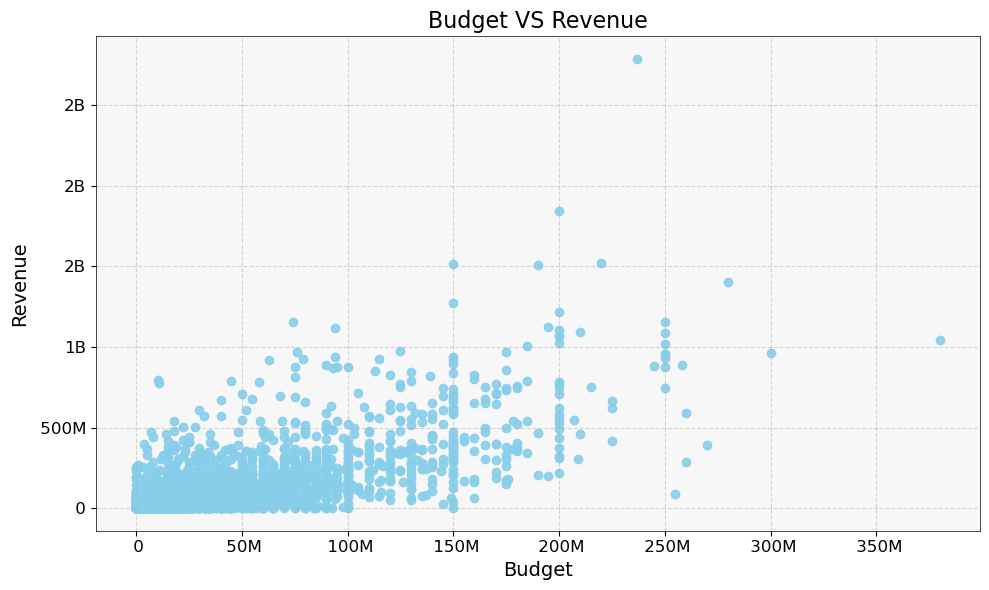

In [55]:
budget = movie_credit['budget']
revenue = movie_credit['revenue']

# Function to format Budget value as Alphanumeric Unit

def format_budget(value , pos):
    if value >=  1e9:
        return f'{value / 1e9 :.0f}B'
    elif value >= 1e6:
        return f'{value / 1e6 : .0f}M'
    elif value >= 1e3:
        return f'{value / 1e3 : .0f}K'
    else:
        return f'{value : .0f}'

# Create Scatter Plot

plt.figure(figsize = (10,6))
plt.scatter(budget , revenue , color = 'skyblue' , alpha =0.9)

plt.xlabel('Budget' , fontsize = 14)
plt.ylabel('Revenue' , fontsize = 14)
plt.title('Budget VS Revenue' , fontsize = 16)

# Customize Appearance and Boundry Appearance

plt.grid(True, linestyle = '--' , alpha = 0.5)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.gca().spines['top'].set_linewidth(0.5)
plt.gca().spines['right'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)

#Add background color

plt.gca().set_facecolor('#f7f7f7')

# Update x & y axis tick label using formt Budget Function , it show Actual value in Million / Billion

plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_budget))
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(format_budget))



plt.tight_layout()
plt.show()

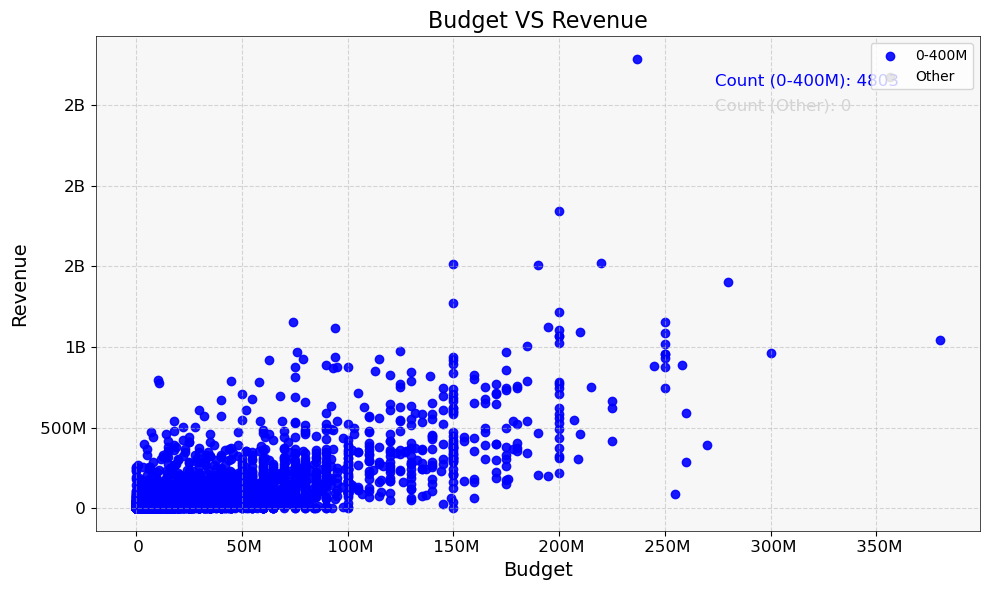

In [52]:
budget = movie_credit['budget']
revenue = movie_credit['revenue']

# Function to format Budget value as Alphanumeric Unit
def format_budget(value, pos):
    if value >= 1e9:
        return f'{value / 1e9 :.0f}B'
    elif value >= 1e6:
        return f'{value / 1e6 : .0f}M'
    elif value >= 1e3:
        return f'{value / 1e3 : .0f}K'
    else:
        return f'{value : .0f}'

# Create Scatter Plot
plt.figure(figsize=(10, 6))

# Filter movies with budget between 0 and 400 million
movies_in_range = movie_credit[(movie_credit['budget'] >= 0) & (movie_credit['budget'] <= 4e8)]

# Plot movies with budget in the specified range in blue
plt.scatter(movies_in_range['budget'], movies_in_range['revenue'], color='blue', alpha=0.9, label='0-400M')

# Plot movies with budget outside the specified range in light gray
movies_out_of_range = movie_credit[~movie_credit.index.isin(movies_in_range.index)]
plt.scatter(movies_out_of_range['budget'], movies_out_of_range['revenue'], color='lightgray', alpha=0.5, label='Other')

plt.xlabel('Budget', fontsize=14)
plt.ylabel('Revenue', fontsize=14)
plt.title('Budget VS Revenue', fontsize=16)

# Customize Appearance and Boundary Appearance
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.gca().spines['top'].set_linewidth(0.5)
plt.gca().spines['right'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)

# Add background color
plt.gca().set_facecolor('#f7f7f7')

# Update x & y axis tick label using format Budget Function, it shows the actual value in Million / Billion
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_budget))
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(format_budget))

# Display counts for each category
count_in_range = len(movies_in_range)
count_out_of_range = len(movies_out_of_range)
plt.annotate(f'Count (0-400M): {count_in_range}', xy=(0.7, 0.9), xycoords='axes fraction', fontsize=12, color='blue')
plt.annotate(f'Count (Other): {count_out_of_range}', xy=(0.7, 0.85), xycoords='axes fraction', fontsize=12, color='lightgray')

plt.legend()
plt.tight_layout()
plt.show()